<a href="https://colab.research.google.com/github/SakethGunda9603/DataScience-Assignment/blob/main/Saketh_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load the datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge transaction and customer data
merged_data = transactions.merge(customers, on="CustomerID")

# Aggregate transaction data for each customer
customer_summary = merged_data.groupby("CustomerID").agg(
    TotalSpend=("TotalValue", "sum"),
    AverageSpend=("TotalValue", "mean"),
    TransactionCount=("TransactionID", "count")
).reset_index()

# Add profile data (e.g., Region)
customer_summary = customer_summary.merge(customers[["CustomerID", "Region"]], on="CustomerID")

# Display the prepared dataset
print(customer_summary.head())


  CustomerID  TotalSpend  AverageSpend  TransactionCount         Region
0      C0001     3354.52       670.904                 5  South America
1      C0002     1862.74       465.685                 4           Asia
2      C0003     2725.38       681.345                 4  South America
3      C0004     5354.88       669.360                 8  South America
4      C0005     2034.24       678.080                 3           Asia


In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ["TotalSpend", "AverageSpend", "TransactionCount"]
customer_summary[numerical_features] = scaler.fit_transform(customer_summary[numerical_features])

# Encode categorical features
encoder = LabelEncoder()
customer_summary["Region"] = encoder.fit_transform(customer_summary["Region"])

# Final dataset for clustering
clustering_data = customer_summary[["TotalSpend", "AverageSpend", "TransactionCount", "Region"]]
print(clustering_data.head())


   TotalSpend  AverageSpend  TransactionCount  Region
0   -0.061701     -0.070263         -0.011458       3
1   -0.877744     -0.934933         -0.467494       0
2   -0.405857     -0.026271         -0.467494       3
3    1.032547     -0.076769          1.356650       3
4   -0.783929     -0.040028         -0.923530       0


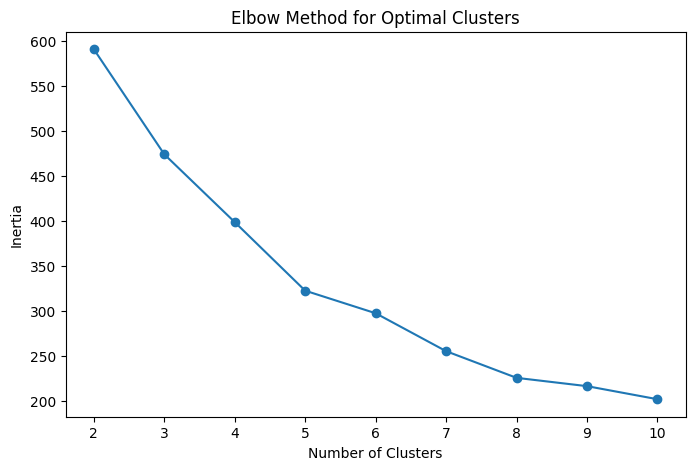

In [5]:
  from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
inertia = []
for k in range(2, 11):  # Testing between 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


In [6]:
# Perform K-Means clustering
optimal_clusters = 4  # Choose based on the elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_summary["Cluster"] = kmeans.fit_predict(clustering_data)

# Display cluster assignments
print(customer_summary[["CustomerID", "Cluster"]].head())


  CustomerID  Cluster
0      C0001        1
1      C0002        2
2      C0003        1
3      C0004        1
4      C0005        2


In [7]:
from sklearn.metrics import davies_bouldin_score

# Calculate DB Index
db_index = davies_bouldin_score(clustering_data, customer_summary["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 1.1404492466222544


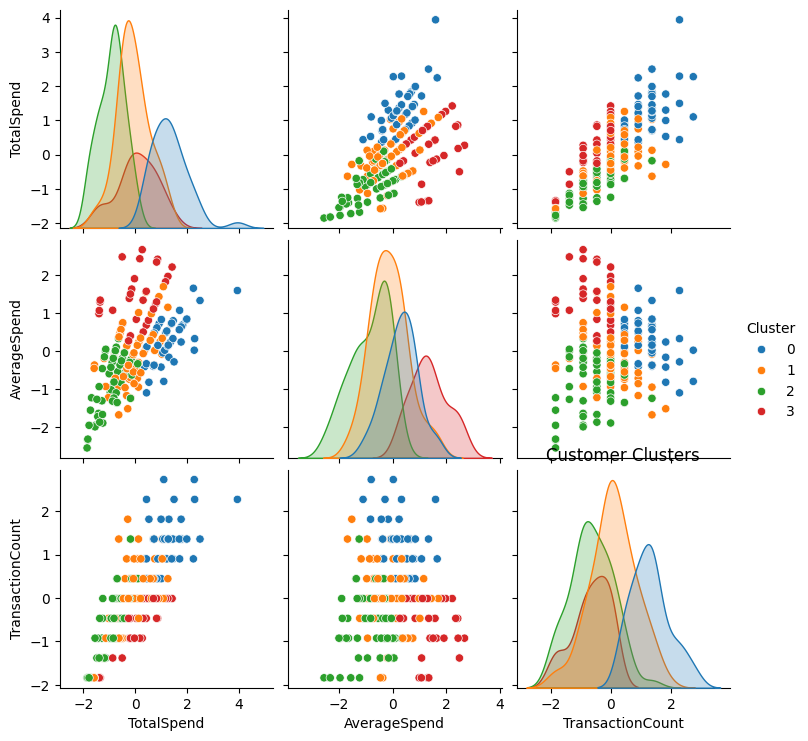

In [8]:
import seaborn as sns

# Visualize clusters using a scatter plot
sns.pairplot(customer_summary, hue="Cluster", vars=numerical_features, palette="tab10")
plt.title("Customer Clusters")
plt.show()
